### Name: Shail Shah
### GitHub: anonshail
### USC ID: 9975958845

#### Imports

In [1]:
import pandas as pd
from collections import defaultdict
import os
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFE, RFECV

warnings.filterwarnings('ignore')

In [2]:
cols = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
dirs = [
    "bending1",
    "bending2",
    "cycling", 
    "lying",
    "sitting",
    "standing", 
    "walking"
]
#data set
ds = defaultdict(list)

trainDataPaths = []
testDataPaths = []

for d in dirs:
    class_type = 0
    if 'bending' in d:
        class_type = 1
    for file in os.listdir(f'../data/test/{d}'):
        if(not file.endswith('.csv')):
            continue
        testDataPaths.append(f'../data/test/{d}/{file}')
        dfi = pd.read_csv(f'../data/test/{d}/{file}', skiprows=4, usecols=range(0,7))
        for c in cols:
            x = pd.DataFrame(dfi[c])
            
            # "mean","min","max","median","first_quart","third_quart","std_dev"
            ds[f'{c}_min'].append(np.min(x)[c])
            ds[f'{c}_max'].append(np.max(x)[c])
            ds[f'{c}_mean'].append(np.mean(x)[c])
            ds[f'{c}_median'].append(np.median(x))
            ds[f'{c}_first_quart'].append(np.quantile(x,0.25))
            ds[f'{c}_third_quart'].append(np.quantile(x,0.75))
            ds[f'{c}_std_dev'].append(np.std(x)[c])
        ds['class'].append(class_type)
            

for d in dirs:
    class_type = 0
    if 'bending' in d:
        class_type = 1
    for file in os.listdir(f'../data/train/{d}'):
        if(not file.endswith('.csv')):
            continue
        trainDataPaths.append(f'../data/train/{d}/{file}')
        dfi = pd.read_csv(f'../data/train/{d}/{file}', skiprows=4, usecols=range(0,7))
        for c in cols:
            x = pd.DataFrame(dfi[c])
            
            # "mean","min","max","median","first_quart","third_quart","std_dev"
            ds[f'{c}_min'].append(np.min(x)[c])
            ds[f'{c}_max'].append(np.max(x)[c])
            ds[f'{c}_mean'].append(np.mean(x)[c])
            ds[f'{c}_median'].append(np.median(x))
            ds[f'{c}_first_quart'].append(np.quantile(x,0.25))
            ds[f'{c}_third_quart'].append(np.quantile(x,0.75))
            ds[f'{c}_std_dev'].append(np.std(x)[c])
        ds['class'].append(class_type)


df = pd.DataFrame.from_dict(ds)
df

,avg_rss12_min,avg_rss12_max,avg_rss12_mean,avg_rss12_median,avg_rss12_first_quart,avg_rss12_third_quart,avg_rss12_std_dev,var_rss12_min,var_rss12_max,var_rss12_mean,...,avg_rss23_third_quart,avg_rss23_std_dev,var_rss23_min,var_rss23_max,var_rss23_mean,var_rss23_median,var_rss23_first_quart,var_rss23_third_quart,var_rss23_std_dev,class
0,38.00,45.67,42.812812,42.500,42.0000,43.6700,1.434054,0.0,1.22,0.372438,...,34.50,1.993175,0.0,3.11,0.571083,0.430,0.0000,1.3000,0.600383,1
1,37.25,45.00,40.624792,40.500,39.2500,42.0000,1.475428,0.0,1.30,0.358604,...,36.00,2.186168,0.0,1.92,0.570583,0.430,0.0000,1.3000,0.582308,1
2,0.00,42.75,27.464604,28.000,25.5000,30.0000,3.579847,0.0,7.76,0.449708,...,20.75,5.048375,0.0,6.76,1.122125,0.830,0.4700,1.3000,1.011287,1
3,12.75,51.00,24.562958,24.250,23.1875,26.5000,3.733619,0.0,6.87,0.590833,...,27.00,3.689936,0.0,4.97,0.700188,0.500,0.4300,0.8700,0.692997,1
4,28.75,44.75,37.561188,36.875,35.2500,40.2500,3.223144,0.0,9.91,2.080688,...,21.50,2.724534,0.0,9.62,2.765896,2.450,1.4100,3.7700,1.767359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,21.50,51.00,34.935813,35.500,32.0000,38.0625,4.641102,0.0,12.21,4.115750,...,18.25,3.188731,0.0,10.21,3.280021,3.015,2.1200,4.5000,1.699145,0
84,18.00,46.00,35.193333,36.000,32.0000,38.7500,4.746916,0.0,16.20,4.321021,...,18.50,3.204299,0.0,8.50,3.241958,3.015,1.8850,4.4400,1.767339,0
85,19.75,45.50,34.322750,35.250,31.0000,38.0000,4.747524,0.0,13.47,4.456333,...,17.75,3.116605,0.0,9.67,3.432562,3.200,2.1575,4.5650,1.730921,0
86,21.50,51.25,34.253521,35.000,30.9375,37.7500,4.935592,0.0,13.55,4.457896,...,18.00,3.113379,0.0,8.32,3.500750,3.285,2.1800,4.5575,1.690614,0


#### 2 Time Series Classification Part 2: Binary and Multiclass Classification

#### 2.a Binary Classification Using Logistic Regression

#### 2.a.i Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

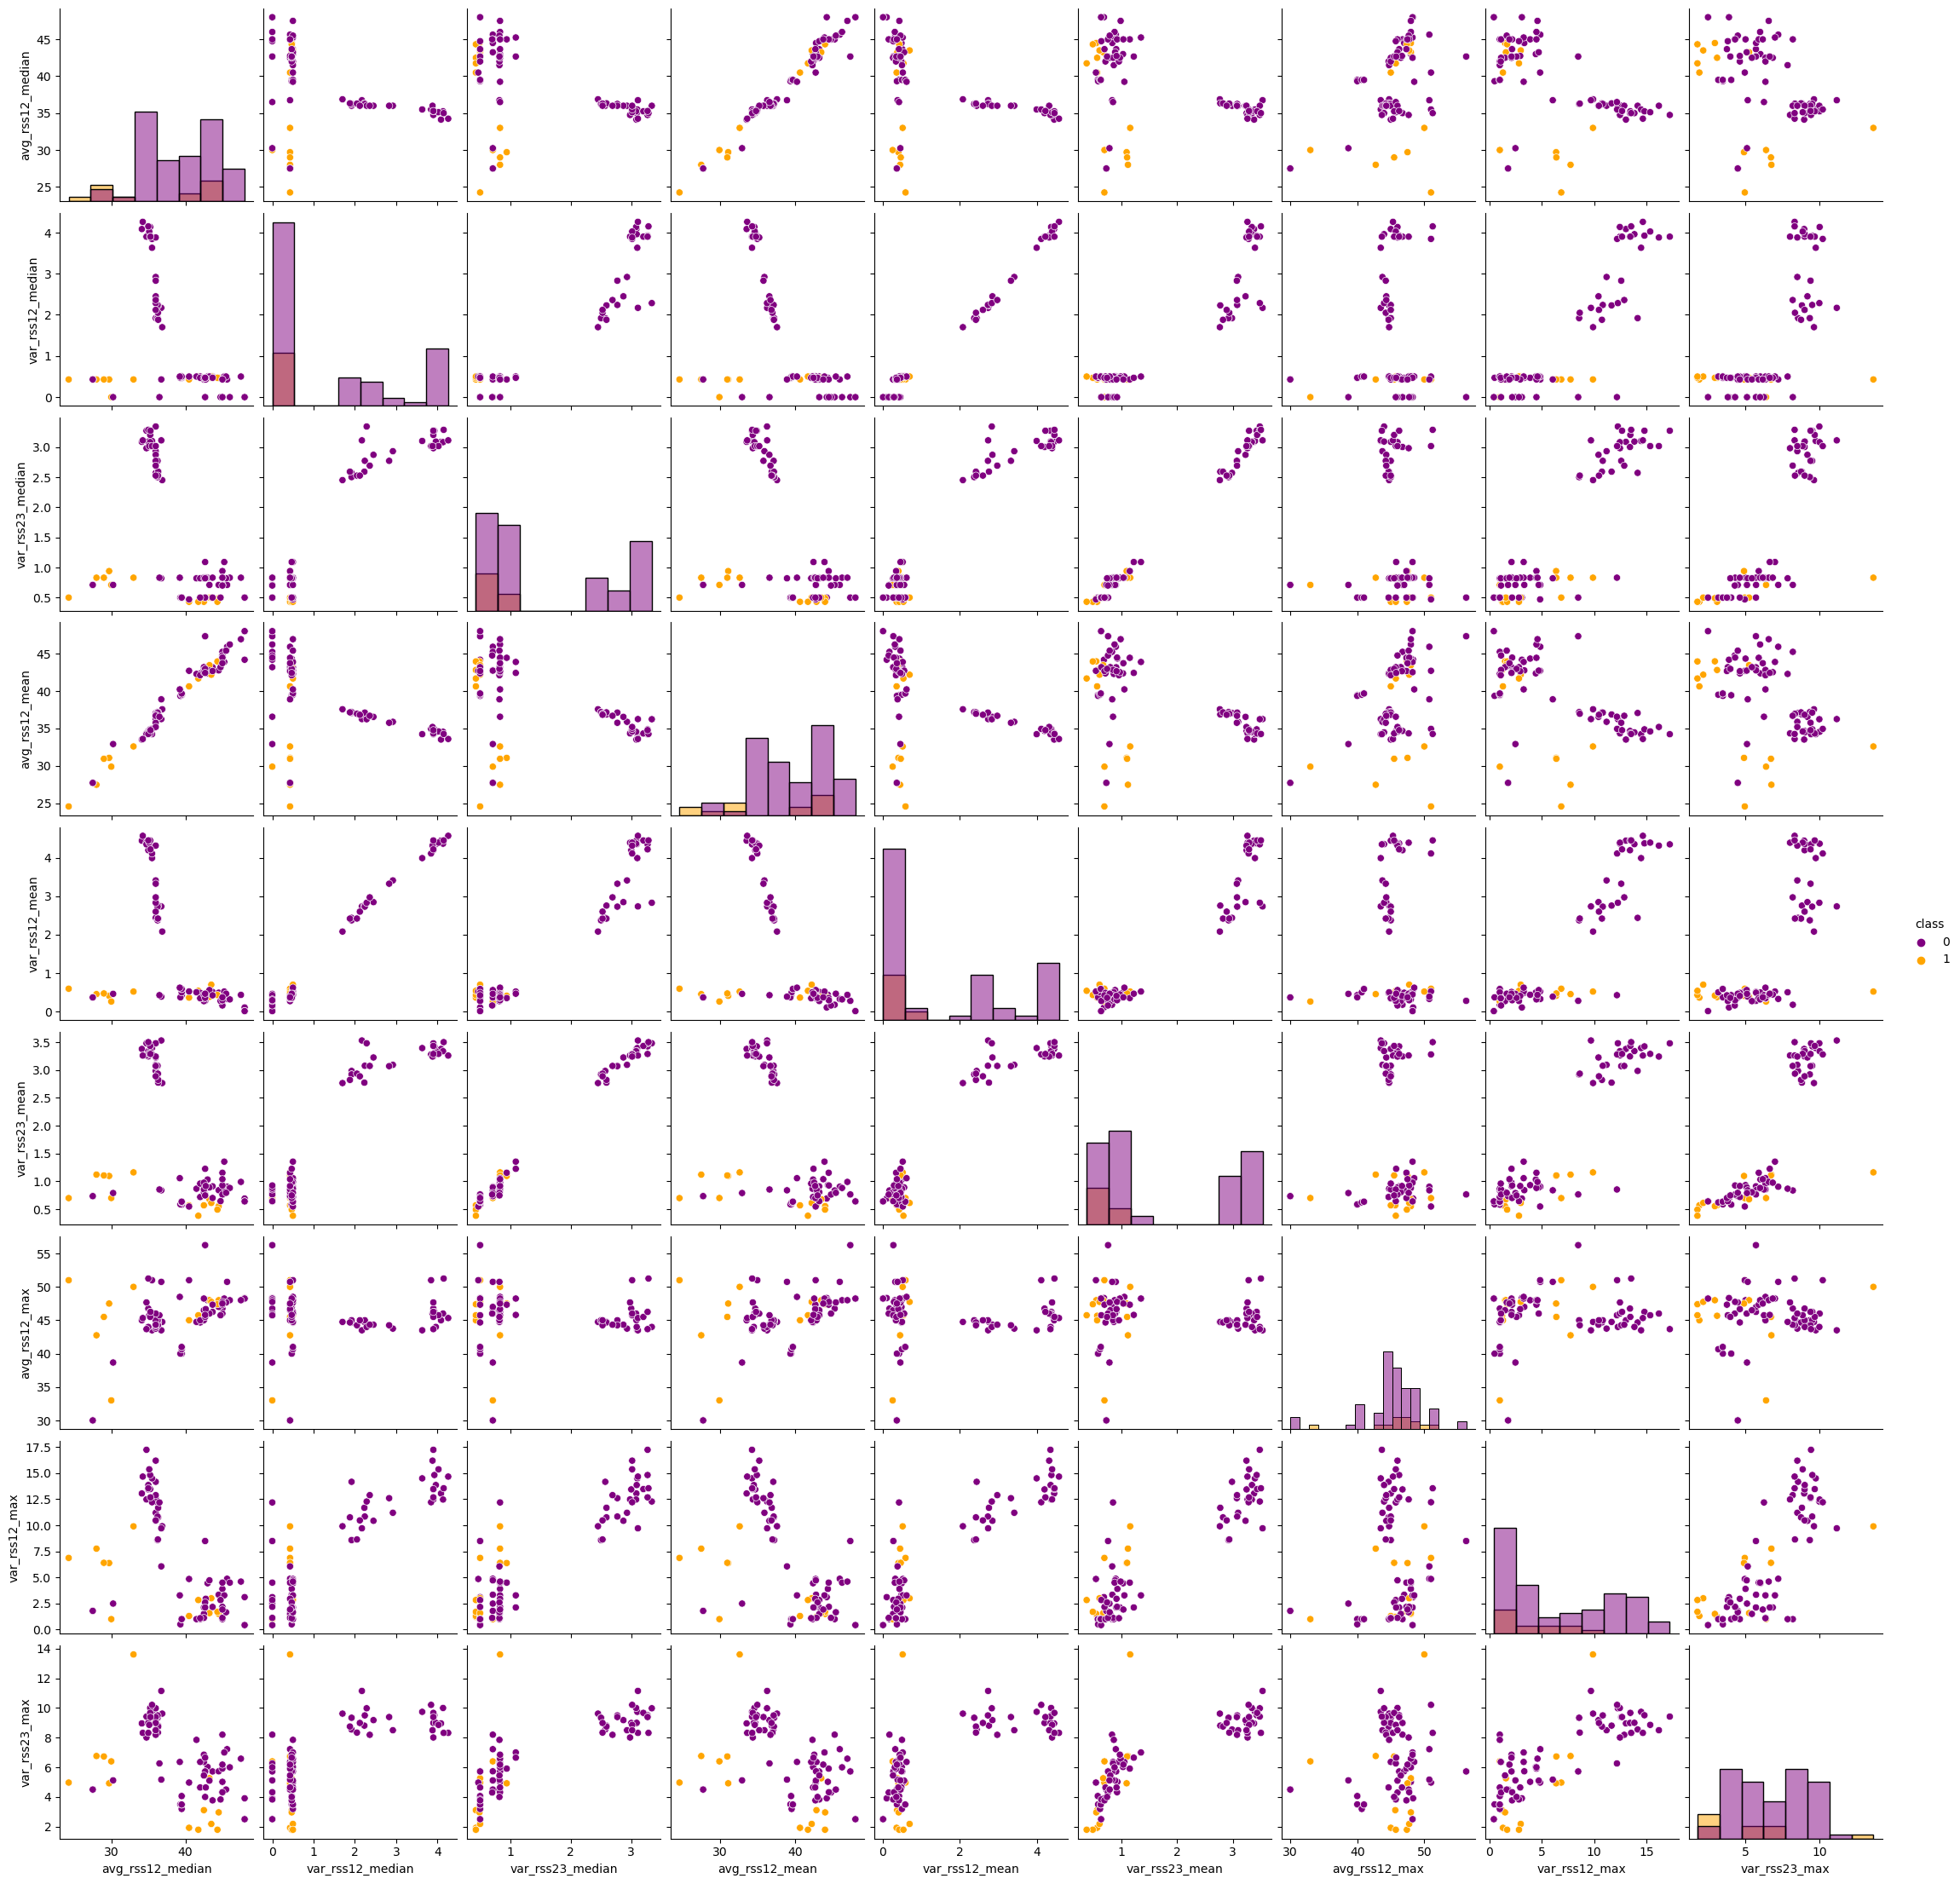

In [3]:
# 1 c ans (From previous homework)
# Median: This will give us an idea of the central tendancy of the dataset, which can help with dealing with outliers.
# Mean: This will give an aggregated value of the dataset. We can also compare the mean with the media to understand how the data is distributed from the lowest to the highest value. If the value of the mean and median are about the same, then the dataset is evenly distributed.
# Maximum value: This will give us an idea of the upper limit value of the time series.

varsToInclude = ["avg_rss12_median","var_rss12_median","var_rss23_median", "avg_rss12_mean","var_rss12_mean","var_rss23_mean", "avg_rss12_max","var_rss12_max","var_rss23_max"]
sns.pairplot(data=df, hue='class', vars = varsToInclude, diag_kind='hist', palette=['purple', 'orange'])
plt.show()

#### 2.a.ii Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

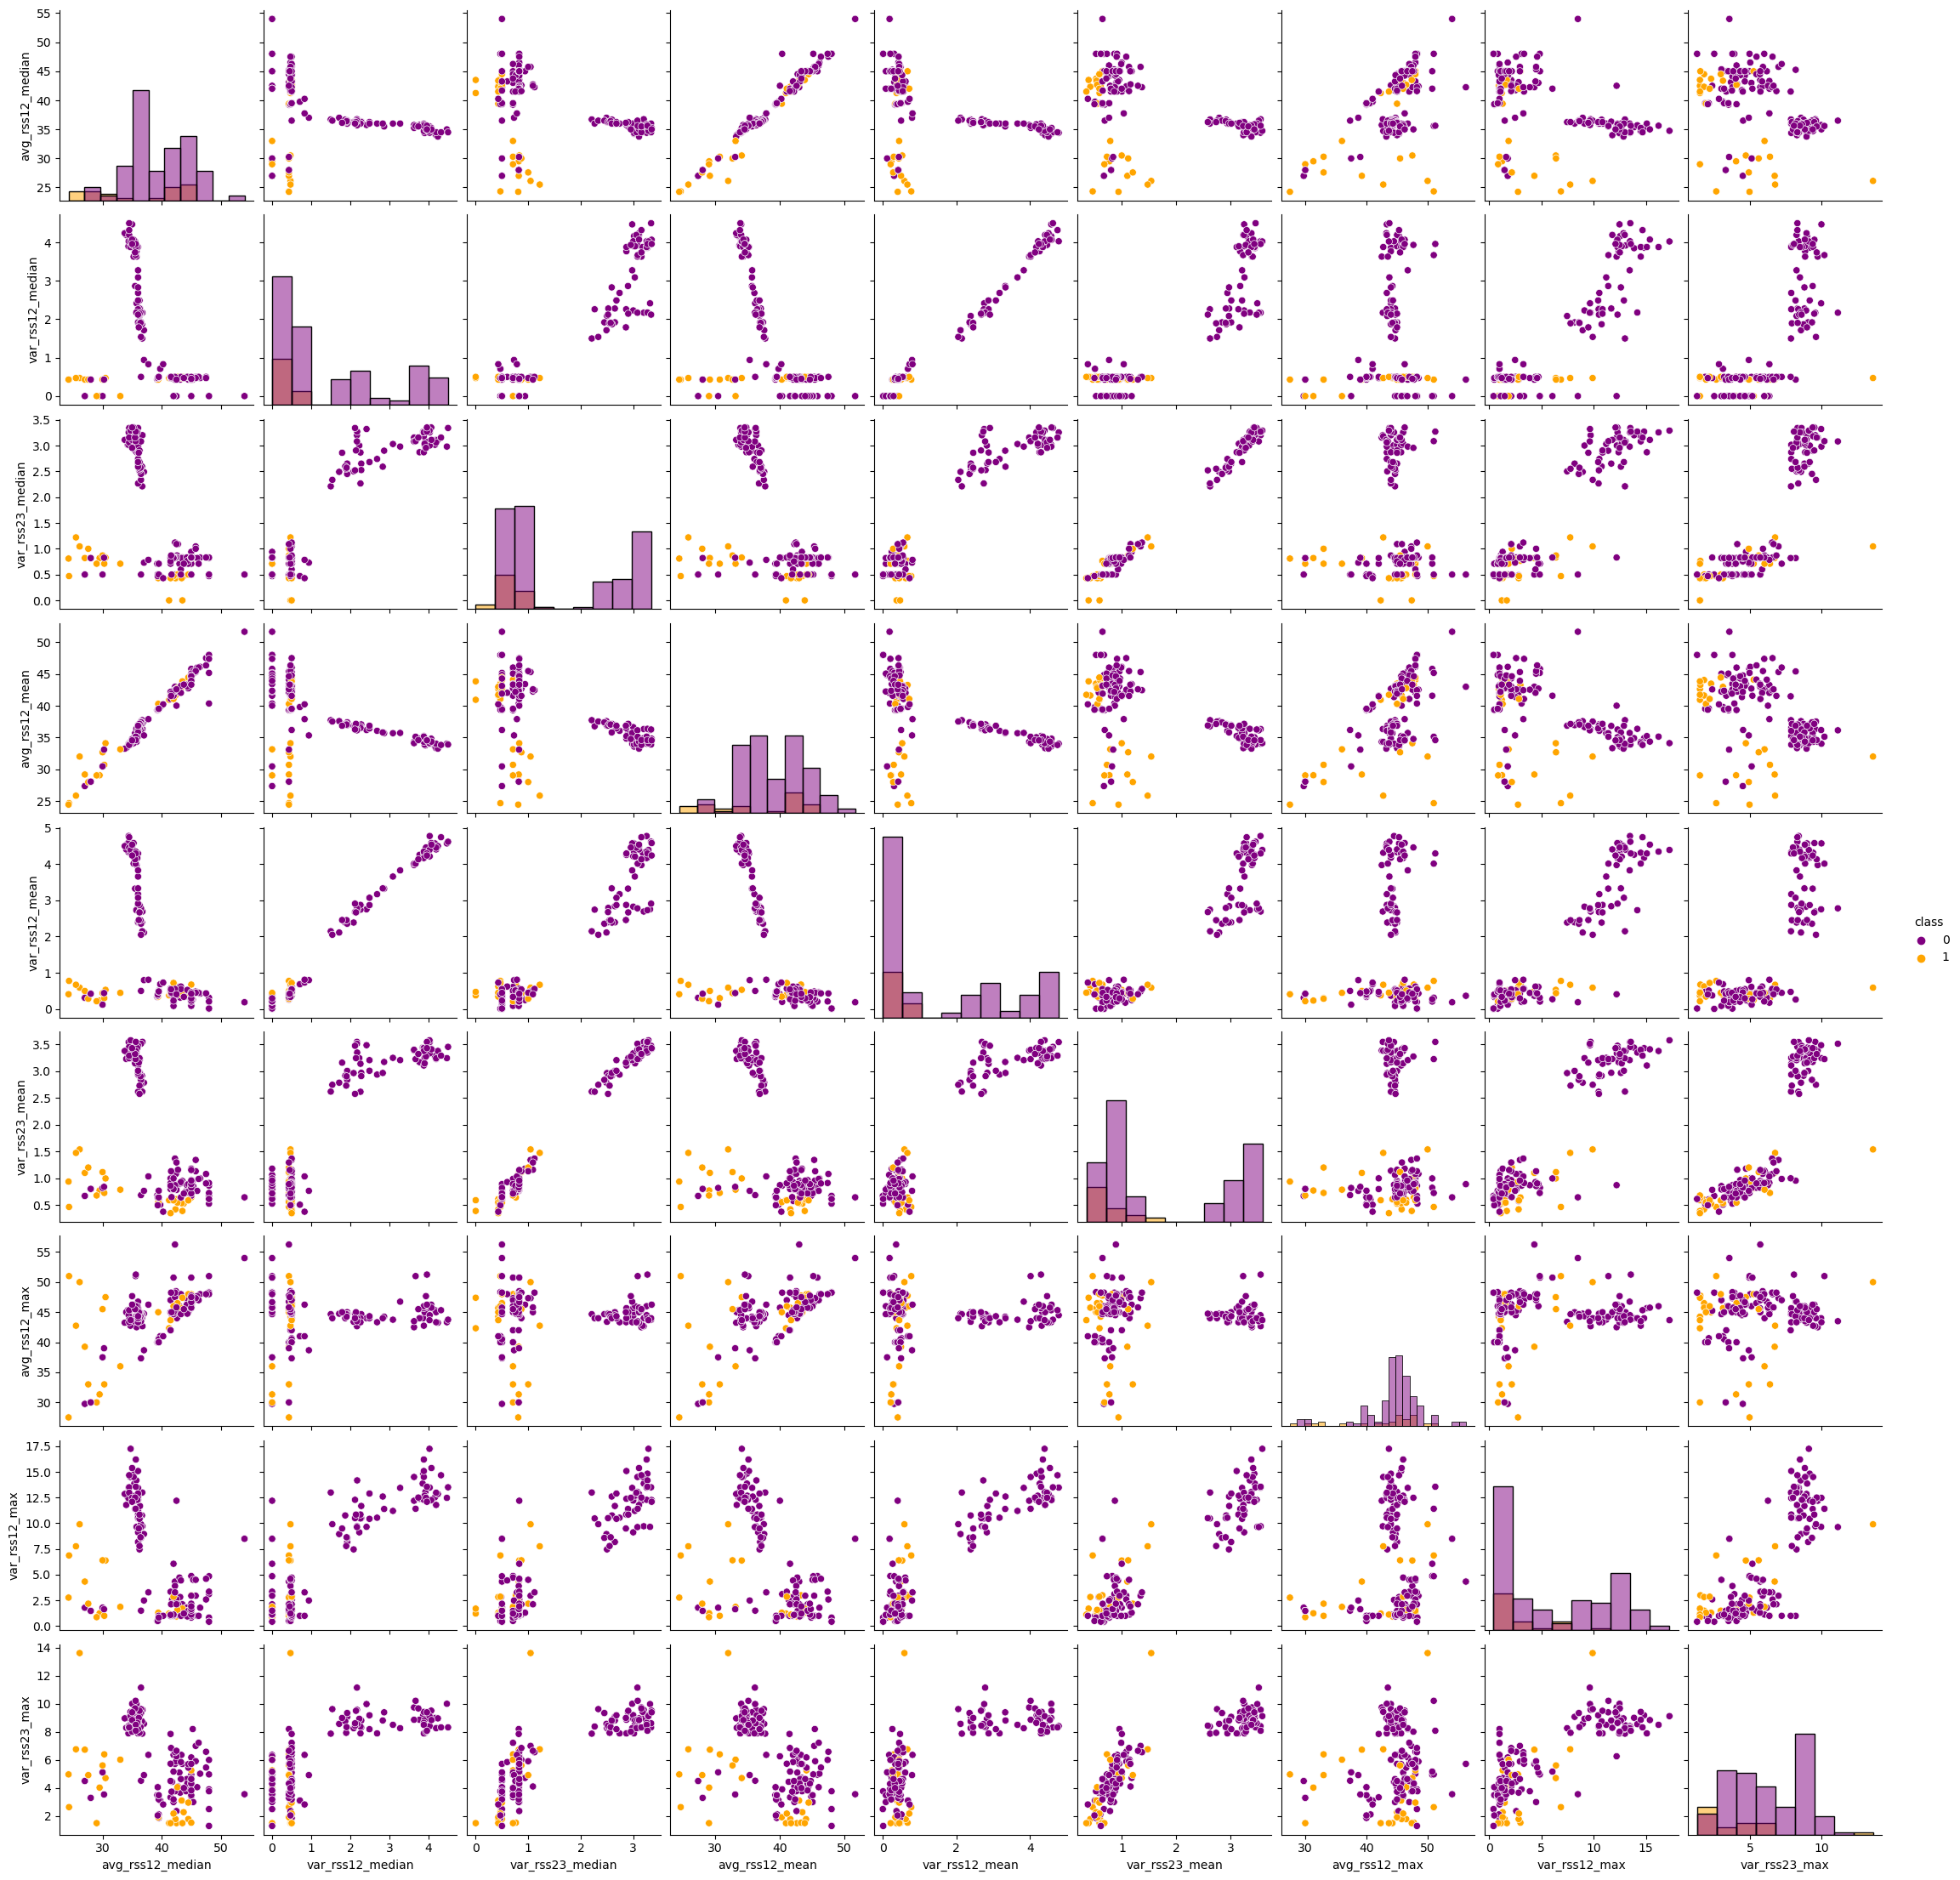

In [4]:
cols = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
dirs = [
    "bending1",
    "bending2",
    "cycling", 
    "lying",
    "sitting",
    "standing", 
    "walking"
]
#data set
ds1 = defaultdict(list)
ds2 = defaultdict(list)


for d in dirs:
    class_type = 0
    if 'bending' in d:
        class_type = 1
    for file in os.listdir(f'../data/test/{d}'):
        if(not file.endswith('.csv')):
            continue
        dfi = pd.read_csv(f'../data/test/{d}/{file}', skiprows=4, usecols=range(0,7))
        
        dfi1 = dfi.head(n=240)
        dfi2 = dfi.iloc[240:,:]
        
        for c in cols:
            x = pd.DataFrame(dfi1[c])
            
            # "mean","min","max","median","first_quart","third_quart","std_dev"
            ds1[f'{c}_min'].append(np.min(x)[c])
            ds1[f'{c}_max'].append(np.max(x)[c])
            ds1[f'{c}_mean'].append(np.mean(x)[c])
            ds1[f'{c}_median'].append(np.median(x))
            ds1[f'{c}_first_quart'].append(np.quantile(x,0.25))
            ds1[f'{c}_third_quart'].append(np.quantile(x,0.75))
            ds1[f'{c}_std_dev'].append(np.std(x)[c])
            
            x = pd.DataFrame(dfi2[c])
            
            # "mean","min","max","median","first_quart","third_quart","std_dev"
            ds2[f'{c}_min'].append(np.min(x)[c])
            ds2[f'{c}_max'].append(np.max(x)[c])
            ds2[f'{c}_mean'].append(np.mean(x)[c])
            ds2[f'{c}_median'].append(np.median(x))
            ds2[f'{c}_first_quart'].append(np.quantile(x,0.25))
            ds2[f'{c}_third_quart'].append(np.quantile(x,0.75))
            ds2[f'{c}_std_dev'].append(np.std(x)[c])
        ds1['class'].append(class_type)
        ds2['class'].append(class_type)
            

for d in dirs:
    class_type = 0
    if 'bending' in d:
        class_type = 1
    for file in os.listdir(f'../data/train/{d}'):
        if(not file.endswith('.csv')):
            continue
        dfi = pd.read_csv(f'../data/train/{d}/{file}', skiprows=4, usecols=range(0,7))
        dfi1 = dfi.head(n=240)
        dfi2 = dfi.iloc[240:,:]
        
        for c in cols:
            x = pd.DataFrame(dfi1[c])
            
            # "mean","min","max","median","first_quart","third_quart","std_dev"
            ds1[f'{c}_min'].append(np.min(x)[c])
            ds1[f'{c}_max'].append(np.max(x)[c])
            ds1[f'{c}_mean'].append(np.mean(x)[c])
            ds1[f'{c}_median'].append(np.median(x))
            ds1[f'{c}_first_quart'].append(np.quantile(x,0.25))
            ds1[f'{c}_third_quart'].append(np.quantile(x,0.75))
            ds1[f'{c}_std_dev'].append(np.std(x)[c])
            
            x = pd.DataFrame(dfi2[c])
            
            # "mean","min","max","median","first_quart","third_quart","std_dev"
            ds2[f'{c}_min'].append(np.min(x)[c])
            ds2[f'{c}_max'].append(np.max(x)[c])
            ds2[f'{c}_mean'].append(np.mean(x)[c])
            ds2[f'{c}_median'].append(np.median(x))
            ds2[f'{c}_first_quart'].append(np.quantile(x,0.25))
            ds2[f'{c}_third_quart'].append(np.quantile(x,0.75))
            ds2[f'{c}_std_dev'].append(np.std(x)[c])
        ds1['class'].append(class_type)
        ds2['class'].append(class_type)


df1 = pd.DataFrame.from_dict(ds1)
df2 = pd.DataFrame.from_dict(ds2)

frames = [df1, df2]
final = pd.concat(frames)
final.reset_index(inplace=True)
sns.pairplot(data=final, hue='class', palette=['purple', 'orange'], vars=varsToInclude, diag_kind='hist')
plt.show()

There is no significant difference between the plots between 2.a.i and 2.a.ii

#### 2.a.iii Break each time series in your training set into l∈ {1,2, . . . ,20} time series of approximately equal length and use logistic regression 5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. 7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not havingany instances of the rare class. In such a case, you can use stratifiedcross validation. Research what it means and use it if needed.

In [6]:
length = 480
cvs=[]
bestFeatures=[]
features=[]

for grp in range(1,21):
    time_features = pd.DataFrame()
    label = []
    for j in range(len(trainDataPaths)):
        training = pd.read_csv(trainDataPaths[j], comment='#', header=None)
        if (j in [0,1,2,3,4,5,6,7,8]):
            label.append([1]*grp)
        else:
            label.append([0]*grp)
        for i in range(grp):
            if (i == grp-1):
                third = training[i*int(length/grp):]
            else:
                third = training[i*int(length/grp):(i+1)*int(length/grp)]
            minimum = np.amin(np.array(third)[:,1:],axis=0)
            maximum = np.amax(np.array(third)[:,1:],axis=0)
            mean = np.mean(np.array(third)[:,1:],axis=0)
            median = np.median(np.array(third)[:,1:],axis=0)
            stddev = np.std(np.array(third)[:,1:],axis=0)
            first_quart = np.percentile(np.array(third)[:,1:],25,axis=0)
            third_quart = np.percentile(np.array(third)[:,1:],75,axis=0)
            time_features = time_features.append(pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T)
    
    time_features = np.array(time_features)
    label = np.array(label).reshape(-1)
    model = LogisticRegression()
    rfe = RFECV(model,step = 1,cv = 5)
    rfe = rfe.fit(time_features,label)
    #print(rfe.support_)
    #print(rfe.ranking_)
    cvs.append(rfe.grid_scores_[rfe.n_features_-1])
    feature_reduced = []
    features.append(rfe.grid_scores_)
    for i in range(len(rfe.support_)):
        if (rfe.support_[i]==True):
            feature_reduced.append(i)
    bestFeatures.append(feature_reduced)
    

l_value = 0
for i in range(len(cvs)):
    if(cvs[l_value] < cvs[i]):
        l_value = i
l_value+=1
print("The best value of L is : %d" %l_value )            
print("Optimal cv score is or Training Score:" , max(cvs))
print("Optimal number of features : %d" % rfe.n_features_)
print("The features are:", bestFeatures[l_value-1])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
cvs
# l_value = 0
# for i in range(len(cvs)):
#     if(cvs[l_value] < cvs[i]):
#         l_value = i
# l_value+=1
# print("The best value of L is : %d" %l_value )            
# print("Optimal cv score is or Training Score:" , max(cvs))
# print("Optimal number of features : %d" % rfe.n_features_)
# print("The features are:", bestFeatures[l_value-1])

[array([1.        , 1.        , 1.        , 0.85714286, 1.        ]),
 array([1.        , 0.89285714, 0.75      , 0.92592593, 0.96296296]),
 array([1.        , 0.95238095, 0.80487805, 0.90243902, 0.92682927]),
 array([0.98214286, 0.94545455, 0.78181818, 0.89090909, 0.89090909]),
 array([0.94202899, 0.98550725, 0.7826087 , 0.86956522, 0.89855072]),
 array([0.96385542, 0.95180723, 0.80722892, 0.87951807, 0.8902439 ]),
 array([0.86597938, 0.95876289, 0.83505155, 0.88541667, 0.90625   ]),
 array([0.93693694, 0.97297297, 0.75454545, 0.88181818, 0.90909091]),
 array([0.864     , 0.95967742, 0.79032258, 0.91935484, 0.88709677]),
 array([0.96376812, 0.97826087, 0.8115942 , 0.86956522, 0.89130435]),
 array([0.90789474, 0.92763158, 0.67105263, 0.91447368, 0.99337748]),
 array([0.92168675, 0.96385542, 0.78915663, 0.90909091, 0.96969697]),
 array([0.91111111, 0.97222222, 0.78212291, 0.87709497, 0.89944134]),
 array([0.93814433, 0.96373057, 0.79792746, 0.88601036, 0.89637306]),
 array([0.86956522, 